# 1. Framing the Problem
The goal of this report is to build three univariate linear regression models to predict the median house value based on three independent variables: median income, population, and number of households. We will evaluate the goodness-of-fit for each model and compare their performance.


# 2. getting the data

 Downloaded from Kaggle [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [19]:
# imports needed for this lab
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Load the dataset using pandas and display the first few rows to check if the dataset us loaded

In [20]:
# Load the dataset using pandas
df = pd.read_csv('housing.csv')

# Display the first few rows of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Exploratory Data Analysis (EDA)
## 1. Explore statistics (e.g. using Pandas `describe` function) 

the relevant columns for this analysis are

In [21]:
# Summary statistics
df[['median_income', 'population', 'households', 'median_house_value']].describe()

,median_income,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,1425.476744,499.539680,206855.816909
std,1.899822,1132.462122,382.329753,115395.615874
min,0.499900,3.000000,1.000000,14999.000000
25%,2.563400,787.000000,280.000000,119600.000000
50%,3.534800,1166.000000,409.000000,179700.000000
75%,4.743250,1725.000000,605.000000,264725.000000
max,15.000100,35682.000000,6082.000000,500001.000000


# 2. Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next

first scatter plot between Median House Value vs Median Income

Text(0.5, 1.0, 'Median House Value vs. Median Income')

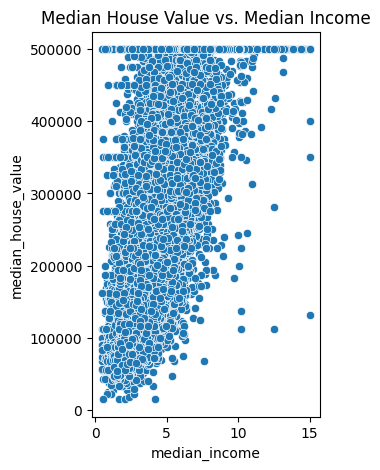

In [32]:
# Scatter plots
plt.figure(figsize=(10, 5))

# Median House Value vs Median Income
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['median_income'], y=df['median_house_value'])
plt.title('Median House Value vs. Median Income')

second scatter plot Median House Value vs Population

Text(0.5, 1.0, 'Median House Value vs. Population')

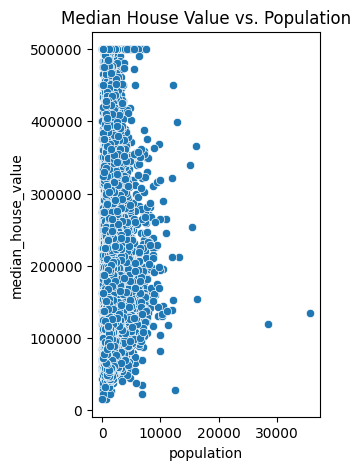

In [33]:
plt.figure(figsize=(10, 5))
# Median House Value vs Population
plt.subplot(1, 3, 2)
sns.scatterplot(x=df['population'], y=df['median_house_value'])
plt.title('Median House Value vs. Population')

third scatter plot Median House Value vs Number of Households

Text(0.5, 1.0, 'Median House Value vs. Number of Households')

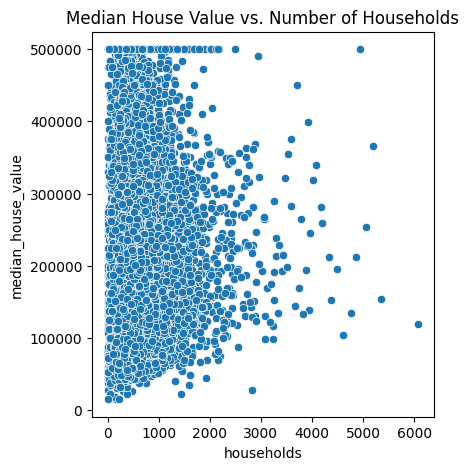

In [34]:
plt.figure(figsize=(15, 5))
# Median House Value vs Number of Households
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['households'], y=df['median_house_value'])
plt.title('Median House Value vs. Number of Households')

# 3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant

Here's a concise description of the four variables used in this lab:

1. Median House Value (Dependent Variable):

Meaning: The median price of houses in a given area, which serves as the target variable for your regression models.
Range: The values appear to range from 0 to around 500,000.
Characteristics: The maximum value seems to be capped at around 500,000, which may indicate the presence of upper limits or censored data.


2. Median Income (Independent Variable):

Meaning: The median household income in a particular region.
Range: The median income varies between approximately 0 and 15.
Characteristics: The scatter plot suggests a positive linear relationship between median income and house value, indicating that higher income areas tend to have higher house values. There are also outliers for very high incomes.


3. Population (Independent Variable):

Meaning: The number of people living in a given area.
Range: The population values range from 0 to over 30,000.
Characteristics: The scatter plot shows a less clear relationship between population and house value, with the data heavily concentrated on lower population areas. The relationship appears weak or non-linear, with the house value not increasing consistently with population size.


4. Number of Households (Independent Variable):

Meaning: The number of households within a given area.
Range: The number of households ranges from 0 to around 6,000.
Characteristics: Similar to the population variable, the relationship between the number of households and house value is not strong. Most data points are concentrated in the lower range (0-2,000 households), and house values do not seem to have a clear trend with increasing households.




# 4. Run three linear regressions (fitting) between:
median house value vs. median income
median house value vs. population
median house value vs. number of households.

define the variables

In [27]:
# Independent variables
X_income = df[['median_income']]
X_population = df[['population']]
X_households = df[['households']]

# Dependent variable
y = df['median_house_value']

initialize the model

In [28]:
# Initialize the model
lr = LinearRegression()

running the model

In [29]:
# Fit models
models = {}
for name, X in zip(['Income', 'Population', 'Households'], [X_income, X_population, X_households]):
    lr.fit(X, y)
    intercept = lr.intercept_
    slope = lr.coef_[0]
    y_pred = lr.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    models[name] = {'Intercept': intercept, 'Slope': slope, 'MSE': mse, 'MAE': mae}

# 5. In a single table for all three linear regressions, provide per regression model:
intercept and slope 
Mean Squared Error 
Mean Absolute Error

In [30]:
# Create a results table
results_df = pd.DataFrame(models).T
print(results_df)

                Intercept         Slope           MSE           MAE
Income       45085.576703  41793.849202  7.011312e+09  62625.933791
Population  210436.262076     -2.511753  1.330741e+10  91153.820095
Households  196928.577162     19.872775  1.325778e+10  90802.743243


# 6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs), add the line parameters (intercept and slope), MSE and MAE to the graph (you can use a text box). You can use any plotting library for that (Matplotlib, Seaborn or Plotly)

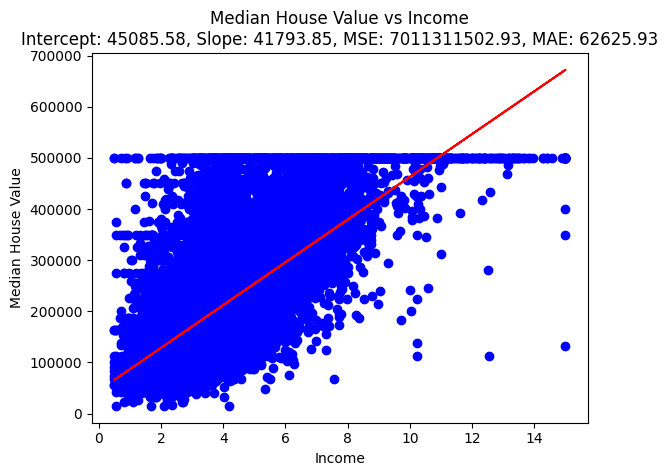

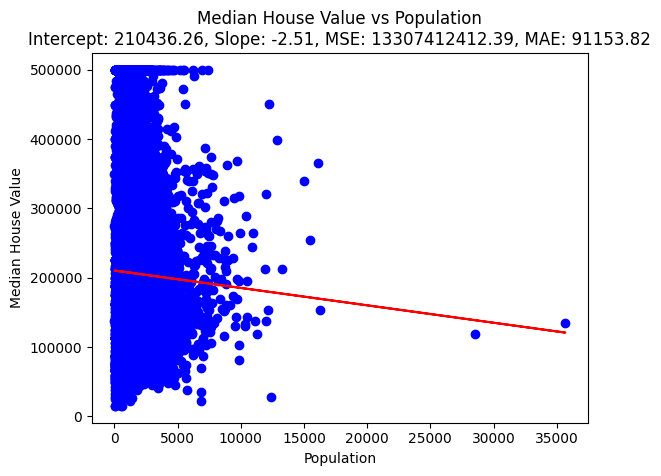

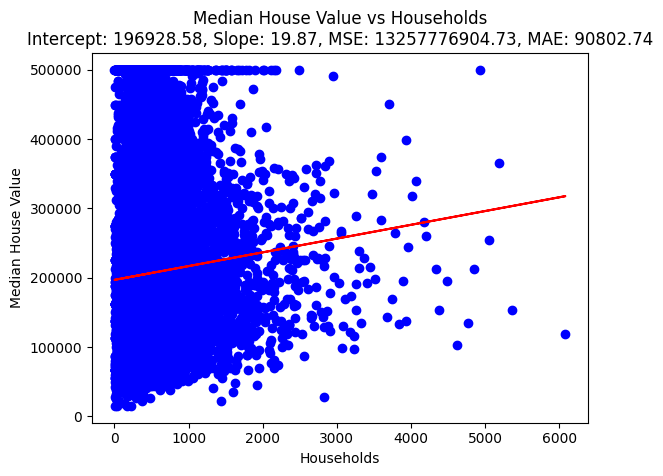

In [31]:
# Plot scatter with regression lines
def plot_regression(x, y, intercept, slope, mse, mae, title):
    plt.scatter(x, y, color='blue')
    plt.plot(x, intercept + slope * x, color='red')
    plt.title(f'{title}\nIntercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.xlabel(title.split(' vs ')[1])
    plt.ylabel('Median House Value')
    plt.show()

# Plot each regression
for name, X in zip(['Income', 'Population', 'Households'], [X_income, X_population, X_households]):
    plot_regression(X.values, y.values, models[name]['Intercept'], models[name]['Slope'], models[name]['MSE'], models[name]['MAE'], f'Median House Value vs {name}')


# 7. Summary: provide a conclusion. Compare the models in terms of their goodness-of-fit, and add additional insights you observed

### Summary and Comparison of the Models:

1. **Median House Value vs Median Income**:
   - **Intercept**: 45085.58
   - **Slope**: 41793.85
   - **MSE**: 7011311502.93
   - **MAE**: 62625.93
   - **Observations**: This model shows a clear positive linear relationship between median income and median house value. The slope is significantly higher than in other models, suggesting that as income increases, house value also increases at a faster rate. However, the capped house values at around $500,000 may affect the accuracy of the fit, as seen by the high MSE and MAE values.

2. **Median House Value vs Population**:
   - **Intercept**: 210436.26
   - **Slope**: -2.51
   - **MSE**: 13307412412.39
   - **MAE**: 91153.82
   - **Observations**: This model shows a weak negative relationship between population and house value, with a nearly flat slope. The population seems to have little impact on house values, which is reflected by the large MSE and MAE values. This suggests that population size is not a strong predictor of house prices in this dataset.

3. **Median House Value vs Number of Households**:
   - **Intercept**: 196928.58
   - **Slope**: 19.87
   - **MSE**: 13257776904.73
   - **MAE**: 90802.74
   - **Observations**: The relationship between the number of households and house value is weak but positive. The slope is small, meaning that an increase in households does not significantly affect house prices. The MSE and MAE are both large, indicating poor model fit and further supporting that the number of households is not a strong predictor.

### Conclusion:
- The model using **median income** as the independent variable offers the best fit based on the slope and relatively lower errors compared to the other two models. It shows a strong positive relationship between income and house prices, which aligns with expectations in real-world scenarios.
- The models for **population** and **number of households** both have weak relationships with house prices, reflected in near-flat slopes and high error values (MSE and MAE). This indicates that these variables are not strong predictors of house value in the dataset.
- **Median income** is by far the most significant predictor of house value among the three variables, but even this model is affected by the capped house values, limiting its accuracy. Further investigation using other variables or addressing the capped data could improve model performance.